<a href="https://colab.research.google.com/github/tejaswinibanavath/mechainlearning/blob/main/dataset6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv("/content/train.csv")

In [ ]:
data.shape

(2000, 21)

In [ ]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: title={'center': 'Correlated with price_range column'}>

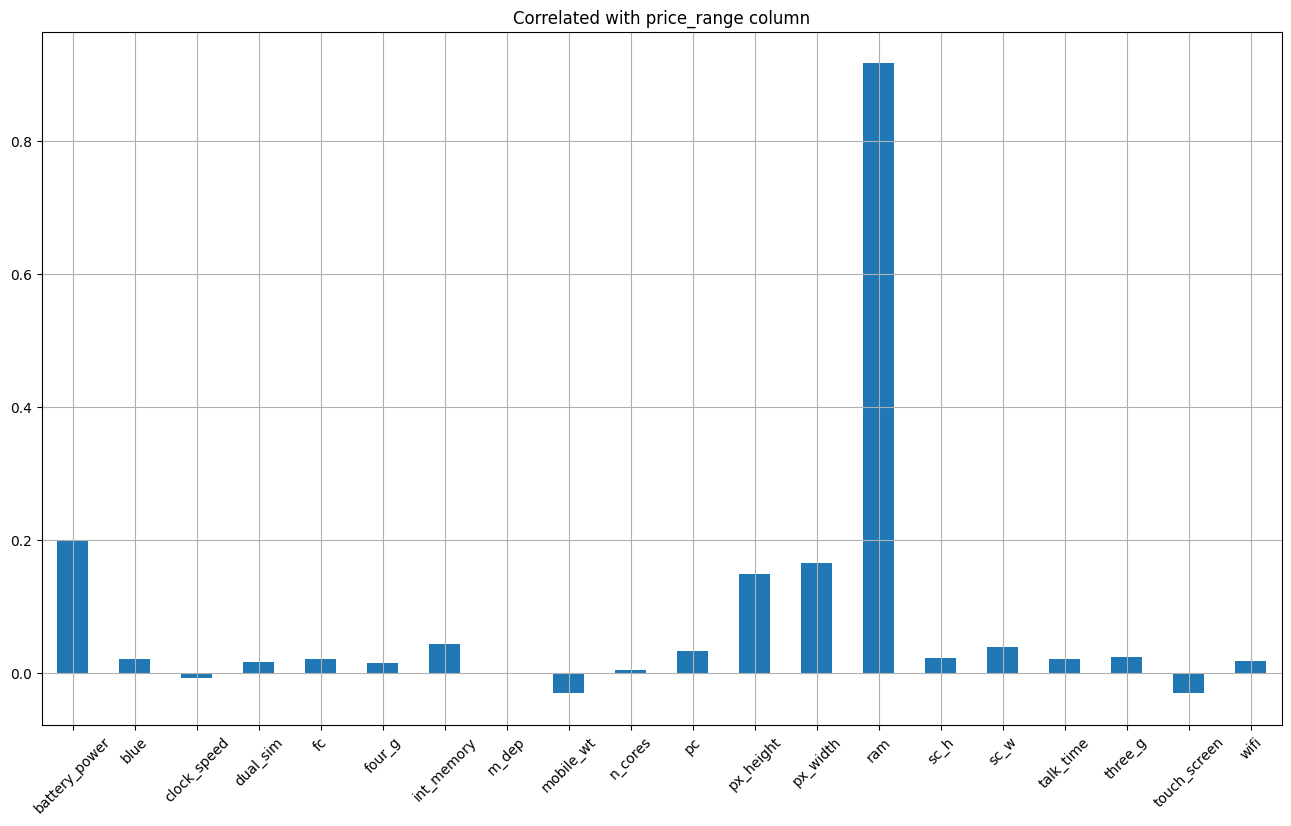

In [ ]:
data1=data.drop(columns='price_range')
data1.corrwith(data['price_range']).plot.bar(figsize=(16,9),title='Correlated with price_range column',rot=45,grid=True)

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

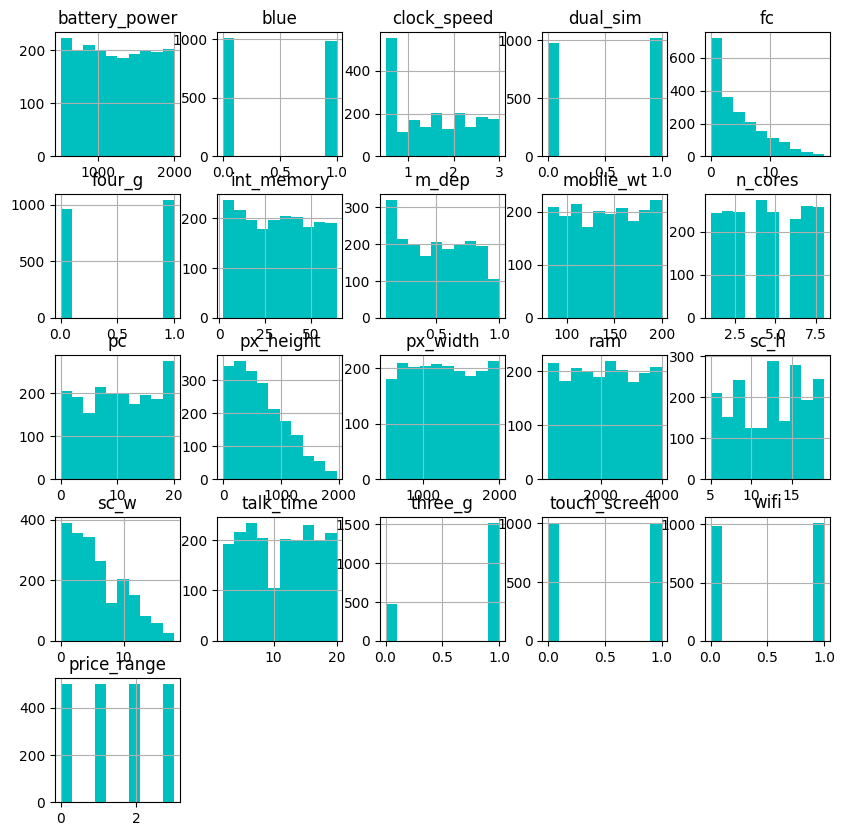

In [ ]:
data.hist(figsize=(10,10),color='c')

<Axes: >

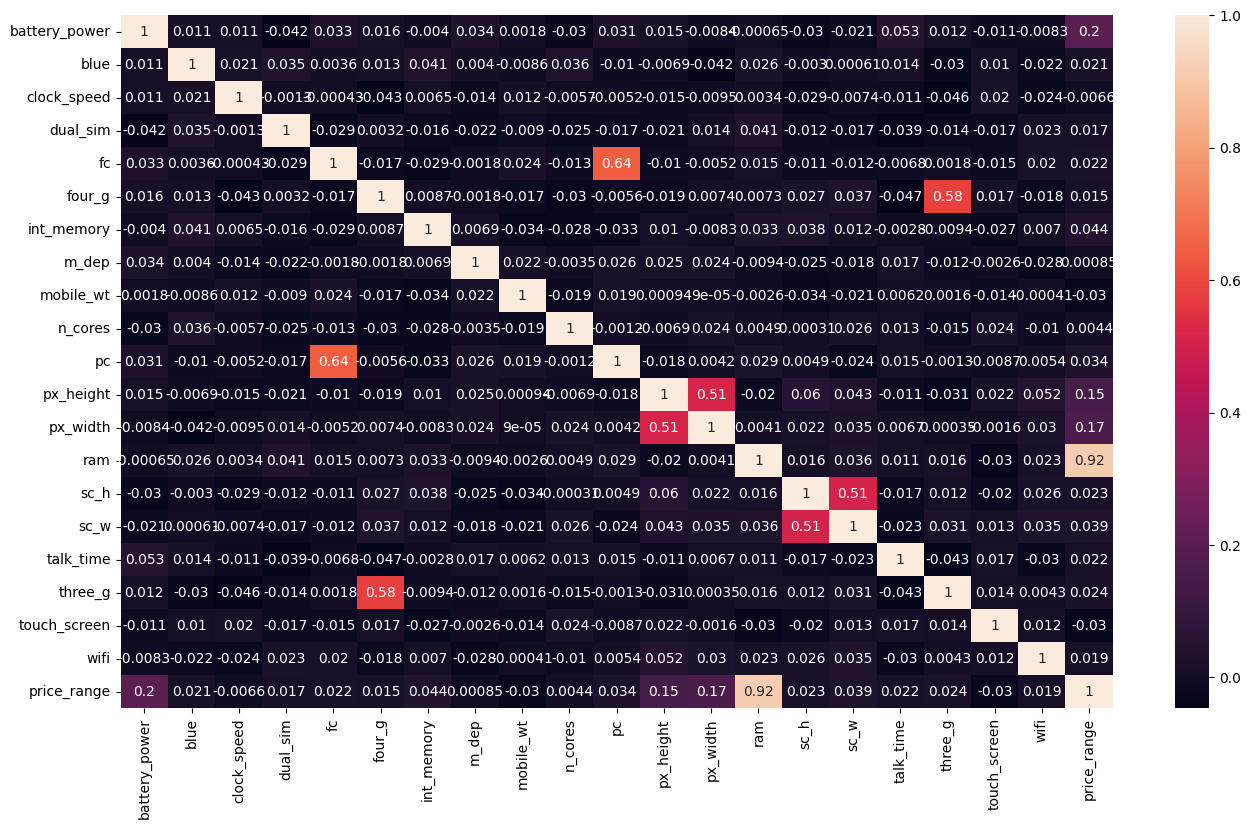

In [ ]:
corr=data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c0ad3be4610>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0ad3be4b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0ad3be4370>],
 'medians': [<matplotlib.lines.Line2D at 0x7c0ad3be5090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c0ad3be5330>],
 'means': []}

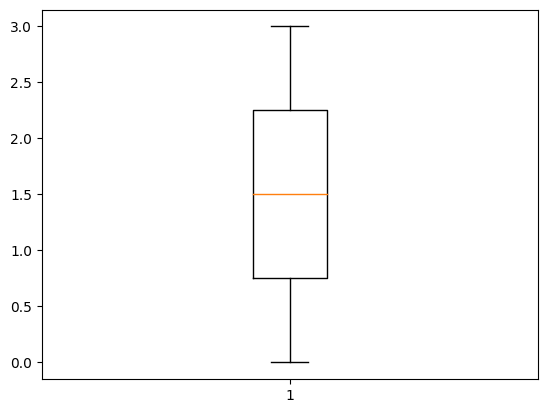

In [ ]:
plt.boxplot(data["price_range"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c0ad3a467a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0ad3a46ce0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0ad3a46500>],
 'medians': [<matplotlib.lines.Line2D at 0x7c0ad3a47220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c0ad3a474c0>],
 'means': []}

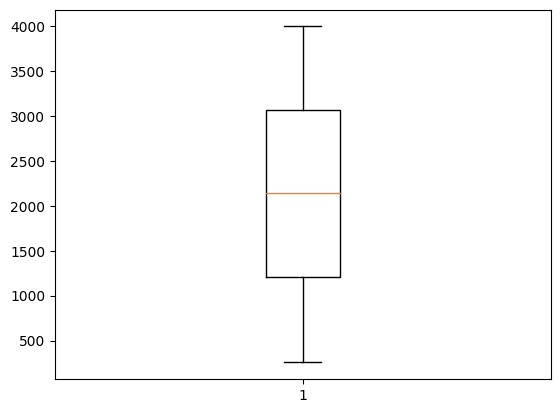

In [ ]:
plt.boxplot(data["ram"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c0ad3ac9270>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0ad3ac97b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0ad3ac8fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c0ad3ac9cf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c0ad3ac9f90>],
 'means': []}

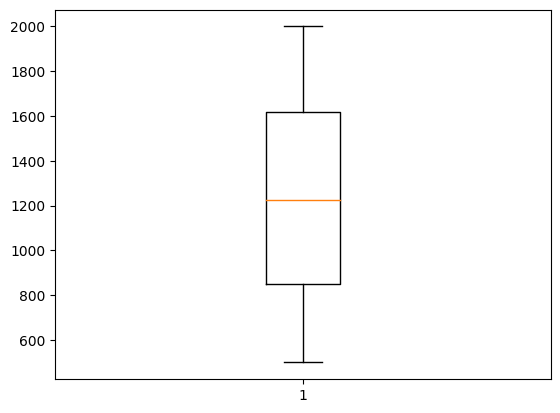

In [ ]:
plt.boxplot(data["battery_power"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c0ad5a73130>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0ad5aac5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0ad66aefb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c0ad5aae5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c0ad5aaec50>],
 'means': []}

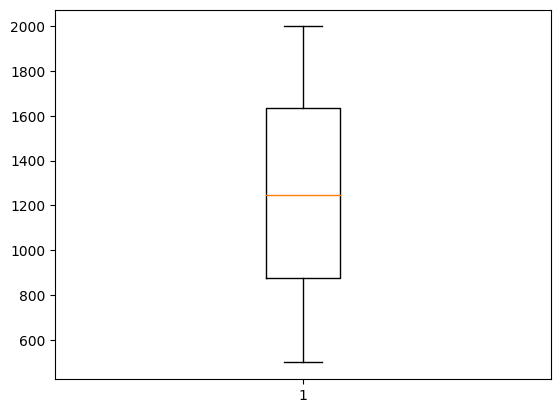

In [ ]:
plt.boxplot(data["px_width"])

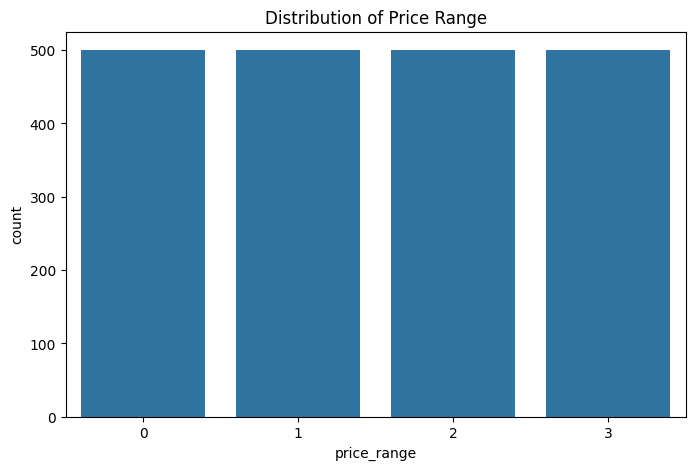

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='price_range', data=data)
plt.title('Distribution of Price Range')
plt.show()

Text(0.5, 1.0, 'Price range Distribution')

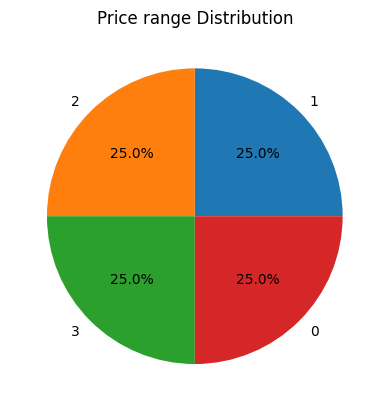

In [ ]:
price= data['price_range'].value_counts()
plt.pie(price.values, labels=price.index, autopct='%1.1f%%')
plt.title("Price range Distribution")

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import export_text
dt_classifier = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_classifier.fit(X_train, y_train)

# Predictions on the validation set
dt_val_predictions = dt_classifier.predict(X_test)

# Evaluate Decision Tree accuracy
dt_accuracy = accuracy_score(y_test, dt_val_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.85


DECISION TREE ALGORITHM

A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks. It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes

In [ ]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Predictions on the validation set
svm_val_predictions = svm_classifier.predict(X_test)

# Evaluate SVM accuracy
svm_accuracy = accuracy_score(y_test, svm_val_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.965


SUPPORT VECTOR MACHINE

It is a supervised machine learning problem where we try to find a hyperplane that best separates the two classes.Linear SVM: When the data is perfectly linearly separable only then we can use Linear SVM. Perfectly linearly separable means that the data points can be classified into 2 classes by using a single straight line(if 2D). Non-Linear SVM: When the data is not linearly separable then we can use Non-Linear SVM, which means when the data points cannot be separated into 2 classes by using a straight line (if 2D) then we use some advanced techniques like kernel tricks to classify them

In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predictions on the validation set
svm_val_predictions = svm_classifier.predict(X_test)

# Evaluate SVM accuracy
svm_accuracy = accuracy_score(y_test, svm_val_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.97


SVM using linear kernel: It gives accuracy 0f o.97 which is better than SVM using RBF kernel which gives an accuracy of 0.96

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Predictions on the testing set
rf_test_predictions = rf_classifier.predict(X_test)

rf_train_predictions = rf_classifier.predict(X_train)

# You can also use cross-validation to evaluate the model
accuracies = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Mean Cross-Validation Accuracy:", np.mean(accuracies))

conf_matrix=confusion_matrix(y_test, rf_test_predictions)
print("confusion matrix:",conf_matrix)

rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
print(f"Random Forest Accuracy for training: {rf_train_accuracy}")

rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print(f"Random Forest Accuracy for testing: {rf_test_accuracy}")

Mean Cross-Validation Accuracy: 0.869375
confusion matrix: [[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]
Random Forest Accuracy for training: 1.0
Random Forest Accuracy for testing: 0.8925


A Random Forest is like a group decision-making team in machine learning. It combines the opinions of many “trees” (individual models) to make better predictions, creating a more robust and accurate overall model.One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables, as in the case of regression, and categorical variables, as in the case of classification

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search to find the best combination of hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from Grid Search
best_rf_classifier = grid_search.best_estimator_

# Fit the model on the training data
best_rf_classifier.fit(X_train, y_train)

# Predictions on the test set
rf_predictions = best_rf_classifier.predict(X_test)

# Evaluate Random Forest accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.8925


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train, y_train, X_test for training and testing data

# Define the features you want to use
features = ['ram', 'battery_power', 'px_height', 'px_width']

# Extract the selected features from the training and testing datasets
X_train_selected = X_train[features]
X_test_selected = X_test[features]

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the testing set
rf_predictions = rf_classifier.predict(X_test_selected)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.9325


In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_classes=4, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predictions on the validation set
xgb_test_predictions = xgb_classifier.predict(X_test)
xgb_train_predictions = xgb_classifier.predict(X_train)

# Evaluate XGBoost accuracy on the validation set
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)

conf_matrix=confusion_matrix(y_test, xgb_test_predictions)
print("confusion matrix:",conf_matrix)

print(f"XGBoost test Accuracy: {xgb_test_accuracy}")
print(f"XGBoost train Accuracy: {xgb_train_accuracy}")

confusion matrix: [[100   5   0   0]
 [  4  85   2   0]
 [  0   7  78   7]
 [  0   0  13  99]]
XGBoost test Accuracy: 0.905
XGBoost train Accuracy: 1.0
